Importing the necessary libraries for the dataset which helps in EDA and Training and Testing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Importing the training and testing dataset

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


    Merging both training and testing dataframe into single dataframe 'titanic_df'

In [6]:
titanic_df=pd.concat([train_df,test_df],ignore_index=True)

In [7]:
titanic_df[(titanic_df['Survived']!=0) & (titanic_df['Survived']!=1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
892,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272
893,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276
894,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154
895,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298
896,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972
898,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738
899,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657
900,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871


In [8]:
titanic_df.Survived.unique()

array([  0.,   1.,  nan])

The Name and Ticket Number column is not required as it doesn't make any sense to dataframe let's drop those columns

In [9]:
titanic_df.drop(['Name','Ticket'],axis=1,inplace=True)

Check for any NaN values

In [10]:
titanic_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
dtype: int64



For age Column The NaN values can be filled with the Median Age

Similarly for Fare Nan Value can be filled with Fare Median value

For Embarked let's fill Nan Values with Southampton,i.e 'S'

C = Cherbourg, Q = Queenstown, S = Southampton

In [11]:
titanic_df.drop('Cabin',axis=1,inplace=True)
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')
titanic_df['Fare']=titanic_df['Fare'].fillna(titanic_df['Fare'].median())

Make sure that the dataset doesn't contain any NaN values

In [12]:
titanic_df.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

Dataset without any NaN values, But it contains both Categorical and numerical data, 
the dataframe can be made completely numerical in the next few steps

In [13]:
print(titanic_df['Sex'].unique())
print(titanic_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Dataframe Sex column contains categorical values, to make it numerical, first it has to be checked what are the unique values in that column and replace those with numerical data, It can be seen that the Sex column has 'Male' and 'Female' as unique values, replacing 'male'=1 and 'female'=0

Similarly for Embarked,The Categorical can be replaced using LabelEncoder

In [14]:
label_enc=LabelEncoder()

for i in ['Sex','Embarked']:
    titanic_df[i]=label_enc.fit_transform(titanic_df[i])

In [15]:
titanic_df.describe()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.503186,1.493506,33.281086,0.385027,655.000000,2.294882,0.644003,0.498854,0.383838
std,12.905241,0.814244,51.741500,0.865560,378.020061,0.837836,0.478997,1.041658,0.486592
min,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,2.000000,14.454200,0.000000,655.000000,3.000000,1.000000,0.000000,0.000000
75%,35.000000,2.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,2.000000,512.329200,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null int64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 92.1 KB


In [17]:
titanic_df.corr()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1.000000,-0.063424,0.178182,-0.125851,0.025799,-0.377908,0.053663,-0.189972,-0.064910
Embarked,-0.063424,1.000000,-0.238131,0.044772,-0.051977,0.185479,0.097960,0.065567,-0.167675
Fare,0.178182,-0.238131,1.000000,0.221635,0.031128,-0.558683,-0.185681,0.160349,0.257307
Parch,-0.125851,0.044772,0.221635,1.000000,0.008942,0.018322,-0.213125,0.373587,0.081629
PassengerId,0.025799,-0.051977,0.031128,0.008942,1.000000,-0.038354,0.013406,-0.055224,-0.005007
Pclass,-0.377908,0.185479,-0.558683,0.018322,-0.038354,1.000000,0.124617,0.060832,-0.338481
Sex,0.053663,0.097960,-0.185681,-0.213125,0.013406,0.124617,1.000000,-0.109609,-0.543351
SibSp,-0.189972,0.065567,0.160349,0.373587,-0.055224,0.060832,-0.109609,1.000000,-0.035322
Survived,-0.064910,-0.167675,0.257307,0.081629,-0.005007,-0.338481,-0.543351,-0.035322,1.000000


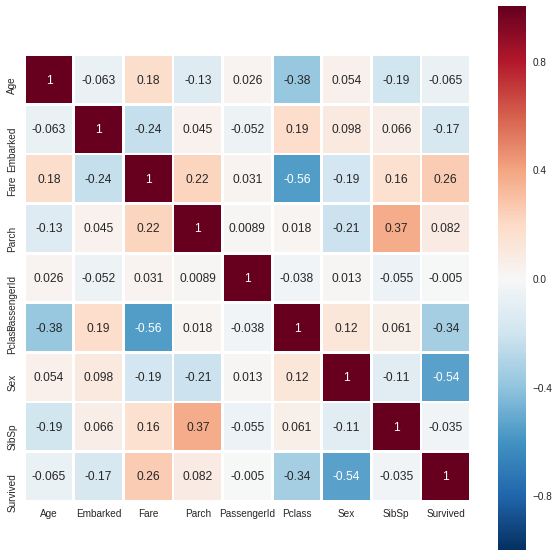

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(),annot=True,square=True,linewidth=2)

By the Heatmap we can see that there is a small correlation between parch and SibSp, and Fare and Survived

Checking the total number of Male and Female passenegers who survived the disaster

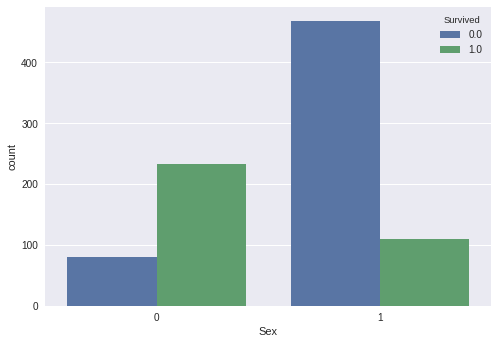

In [19]:
sns.countplot(x='Sex',hue='Survived',data=titanic_df)

From the figure it can be said that the Female passangers has higher chance of survival compared with male, and it can also be said that the preference was given to female passangers than male passangers.

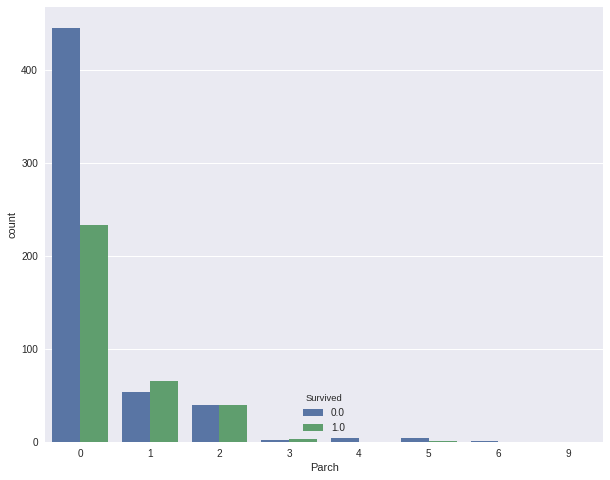

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='Parch',hue='Survived',data=titanic_df)

From figure we can say that individuals are the one who had higher Survial and Death rate compared with people who had family.

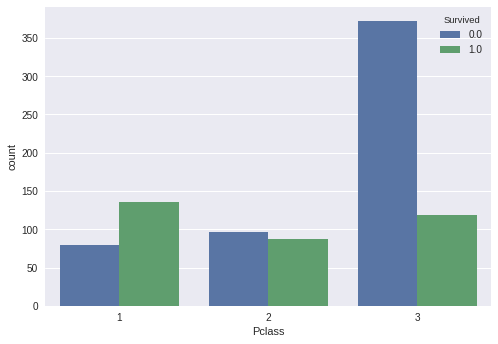

In [21]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_df)

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

The survival rate for the passangers in the Lower class was very less, and also we can say that there were more number of people in lower class as compared with the other two classes , the figure is plotted below

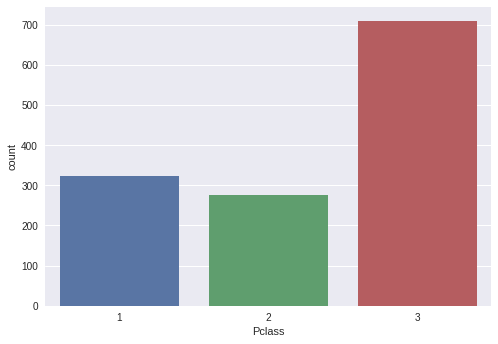

In [22]:
sns.countplot(x='Pclass',data=titanic_df)

Dividing the age of the passangers depening on their age

1]children upto age 10

2]Young from age 10 to 18

3] Adult from age 18 to 50

4] Senior from 50

In [23]:
for i in range(len(titanic_df)):
    if titanic_df['Age'][i]<=10:
        titanic_df['Age'][i]=1
    if (titanic_df['Age'][i]>10) & (titanic_df['Age'][i]<=18):
            titanic_df['Age'][i]=2
    if (titanic_df['Age'][i]>18) & (titanic_df['Age'][i]<50):
            titanic_df['Age'][i]=3
    if titanic_df['Age'][i]>=50:
            titanic_df['Age'][i]=4

    Lets check what is the survival rate on the age range

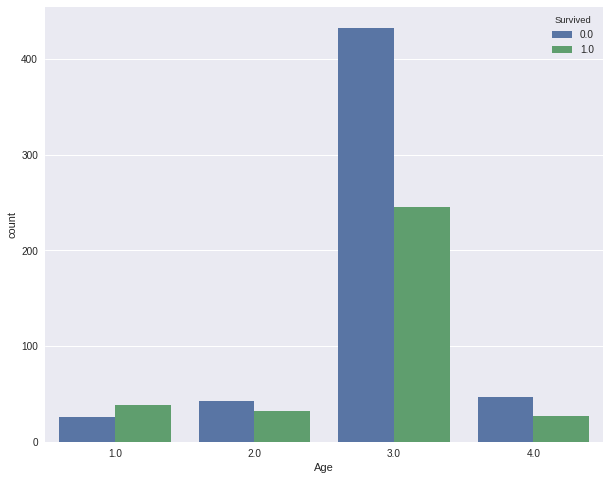

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',hue='Survived',data=titanic_df)

It can be seen that the large number of people are in the age group from 18 to 50

(array([ 1071.,   154.,    42.,     4.,    21.,    13.,     0.,     0.,
            0.,     4.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

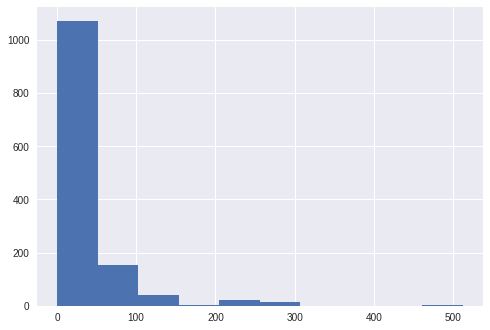

In [25]:
plt.hist(titanic_df['Fare'])

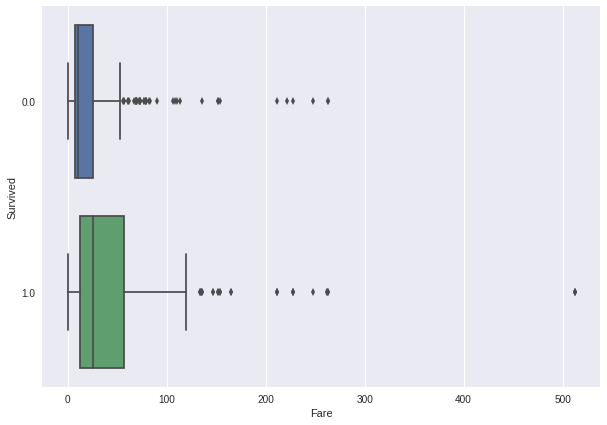

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Fare',y='Survived',data=titanic_df,orient='h')

It can be seen that there is a small correlation between Fare and survival rate where the surivval rate is quite high, for the ticket charges which is high.

The survived people Ticket fare is high as compared with Non survived people for both male and female

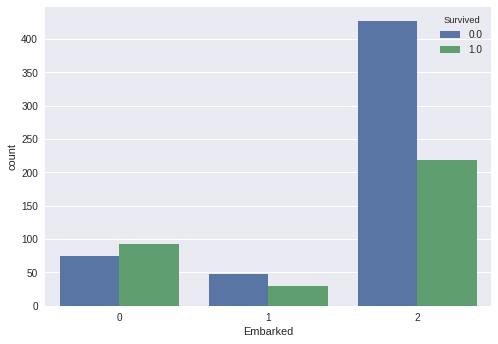

In [28]:
sns.countplot(x='Embarked',hue='Survived',data=titanic_df)

There were large number of people who embarked from Southampton due to which there are high number of Deaths and Survival rate,Compared with Queenstown and cherbourg

Training and testing the dataset with LogisticRegression,SVC and RandomForestClassifier

In [70]:
titanic_df.dropna(inplace=True)
X=titanic_df.drop('Survived',axis=1)
y=titanic_df['Survived']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [72]:
titanic_df.dropna(inplace=True)

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


LogisticRegression

In [74]:
model=LogisticRegression(C=100)
model.fit(X_train,y_train)
test_result=model.predict(X_test)
model.score(X_train,y_train)
model.score(X_test,y_test)

0.78923766816143492

RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier


In [76]:
rand_model=RandomForestClassifier()
rand_model.fit(X_train,y_train)
rand_predict=rand_model.predict(X_test)
roc_auc_score(y_test,rand_predict)

0.7971051730044536

SVC-Support vector Classifier

In [77]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
svc_predict=svc_model.predict(X_test)
roc_auc_score(y_test,svc_predict)

0.49738780404248029

Submission

In [78]:
predictions=pd.DataFrame(test_result,columns=['predict']).to_csv('predictions.csv')

In [79]:
submission=pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':test_result})

In [80]:
submission.to_csv('gender_submission.csv',index=False)